# S03 T02: Visualització gràfica de Múltiples variables 2
## Nivell 2
### Exercici 2
Repeteix l'exercici 1 amb el dataset que disposem en el repositori de GitHub PRE-PROCESSING-DATA, movies.dat

#### Analizo y limpio el dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')

In [2]:
#Importar el data .txt
movies = pd.read_table('movies.dat.txt',sep="::", encoding="latin-1")

movies.head(5)




,1,Toy Story (1995),Animation|Children's|Comedy
0,2,Jumanji (1995),Adventure|Children's|Fantasy
1,3,Grumpier Old Men (1995),Comedy|Romance
2,4,Waiting to Exhale (1995),Comedy|Drama
3,5,Father of the Bride Part II (1995),Comedy
4,6,Heat (1995),Action|Crime|Thriller


In [3]:
#especifico que no hay encabezado

movies = pd.read_table('movies.dat.txt',sep="::", header=None, index_col = 0, encoding="latin-1")

movies.head(5)

,1,2
0,,
1,Toy Story (1995),Animation|Children's|Comedy
2,Jumanji (1995),Adventure|Children's|Fantasy
3,Grumpier Old Men (1995),Comedy|Romance
4,Waiting to Exhale (1995),Comedy|Drama
5,Father of the Bride Part II (1995),Comedy


In [4]:
#creo encabezado

movies.columns= ["Título", "género"]

movies.head(5)

,Título,género
0,,
1,Toy Story (1995),Animation|Children's|Comedy
2,Jumanji (1995),Adventure|Children's|Fantasy
3,Grumpier Old Men (1995),Comedy|Romance
4,Waiting to Exhale (1995),Comedy|Drama
5,Father of the Bride Part II (1995),Comedy


In [5]:
#dimensiones del data
movies.shape

(3883, 2)

In [6]:
movies['género'] = movies.género.str.split('|')

movies.head()


,Título,género
0,,
1,Toy Story (1995),"[Animation, Children's, Comedy]"
2,Jumanji (1995),"[Adventure, Children's, Fantasy]"
3,Grumpier Old Men (1995),"[Comedy, Romance]"
4,Waiting to Exhale (1995),"[Comedy, Drama]"
5,Father of the Bride Part II (1995),[Comedy]


**Voy a crear una columna de año de la película (seprándola del título)**

In [7]:
#Creo dos columnas nuevas con título y año separado

movies['Ano']=movies['Título'].str[-5:-1]
movies['Titulo']=movies['Título'].str[:-7]


movies.head()

,Título,género,Ano,Titulo
0,,,,
1,Toy Story (1995),"[Animation, Children's, Comedy]",1995,Toy Story
2,Jumanji (1995),"[Adventure, Children's, Fantasy]",1995,Jumanji
3,Grumpier Old Men (1995),"[Comedy, Romance]",1995,Grumpier Old Men
4,Waiting to Exhale (1995),"[Comedy, Drama]",1995,Waiting to Exhale
5,Father of the Bride Part II (1995),[Comedy],1995,Father of the Bride Part II


In [8]:
#Elimino la columna original de título
movies = movies.drop(movies.columns[0], axis='columns')

movies.head()

,género,Ano,Titulo
0,,,
1,"[Animation, Children's, Comedy]",1995,Toy Story
2,"[Adventure, Children's, Fantasy]",1995,Jumanji
3,"[Comedy, Romance]",1995,Grumpier Old Men
4,"[Comedy, Drama]",1995,Waiting to Exhale
5,[Comedy],1995,Father of the Bride Part II


In [9]:
# Ubico primero y segundo las columnas Titulo y año
firstColumn = movies.pop('Titulo')
secondColumn = movies.pop('Ano')

movies.insert(0, 'Titulo', firstColumn)
movies.insert(1, 'Ano', secondColumn)

movies.head()

,Titulo,Ano,género
0,,,
1,Toy Story,1995,"[Animation, Children's, Comedy]"
2,Jumanji,1995,"[Adventure, Children's, Fantasy]"
3,Grumpier Old Men,1995,"[Comedy, Romance]"
4,Waiting to Exhale,1995,"[Comedy, Drama]"
5,Father of the Bride Part II,1995,[Comedy]


**Análisis general del cuadro**

In [10]:
movies.dtypes

Titulo    object
Ano       object
género    object
dtype: object

In [11]:
#Convierto la columna Ano de Objeto a integer para manejarlo mejor

movies['Ano']=movies['Ano'].astype(int)

movies.dtypes

Titulo    object
Ano        int64
género    object
dtype: object

## Nivel 2
Repeteix l'exercici 1 amb el dataset que disposem en el repositori de GitHub PRE-PROCESSING-DATA, movies.dat

In [12]:
movies.describe()

,Ano
count,3883.000000
mean,1986.066959
std,16.895690
min,1919.000000
25%,1982.000000
50%,1994.000000
75%,1997.000000
max,2000.000000


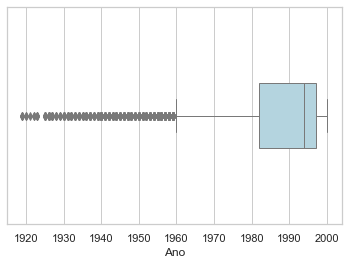

In [13]:
sns.set(style="whitegrid")
ax = sns.boxplot(x = movies['Ano'], color='lightblue', fliersize=5, orient='v', linewidth=1, width=0.3)

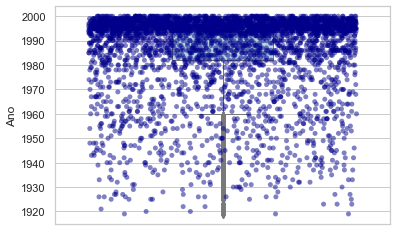

In [14]:
ax = sns.boxplot(y="Ano", data=movies,  color='lightblue', fliersize=5,  orient='v', linewidth=1 , width=0.3)
ax = sns.stripplot(y=movies['Ano'], orient='v', color='darkblue', alpha= 0.5, jitter=0.4)

#aumento el jitter de 0,1 (estandart) a 0.4 para que se vea mejor 

Se ve que la muestra de películas esta concentrada entre 1982 y 1997. Dentro de estos años se concentran las películas entre el '82 y el '94.

## Nivel 3

In [15]:

#Copiando el marco de datos de la pelicula en uno nuevo ya que no necesitamos la información del género por ahora.
moviesConGenero = movies.copy()

#Para cada fila del marco de datos, iterar la lista de géneros y colocar un 1 en la columna que corresponda
for index, row in movies.iterrows():
    for genre in row['género']:
        moviesConGenero.at[index, genre] = 1
#Completar los valores NaN con 0 para mostrar que una película no tiene el género de la columna
moviesConGenero = moviesConGenero.fillna(0)

moviesConGenero.head()

,Titulo,Ano,género,Animation,Children's,Comedy,Adventure,Fantasy,Romance,Drama,...,Crime,Thriller,Horror,Sci-Fi,Documentary,War,Musical,Mystery,Film-Noir,Western
0,,,,,,,,,,,,,,,,,,,,,
1,Toy Story,1995,"[Animation, Children's, Comedy]",1.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Jumanji,1995,"[Adventure, Children's, Fantasy]",0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Grumpier Old Men,1995,"[Comedy, Romance]",0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Waiting to Exhale,1995,"[Comedy, Drama]",0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,Father of the Bride Part II,1995,[Comedy],0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [16]:
#Borro del nuevo data Título y la columna de todos los generos para graficar
moviesConGenero = moviesConGenero.drop(['Titulo', 'género'], axis = 1)

moviesConGenero.head()

,Ano,Animation,Children's,Comedy,Adventure,Fantasy,Romance,Drama,Action,Crime,Thriller,Horror,Sci-Fi,Documentary,War,Musical,Mystery,Film-Noir,Western
0,,,,,,,,,,,,,,,,,,,
1,1995,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1995,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1995,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1995,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,1995,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [17]:
moviesConGenero.columns

Index(['Ano', 'Animation', 'Children's', 'Comedy', 'Adventure', 'Fantasy',
       'Romance', 'Drama', 'Action', 'Crime', 'Thriller', 'Horror', 'Sci-Fi',
       'Documentary', 'War', 'Musical', 'Mystery', 'Film-Noir', 'Western'],
      dtype='object')

In [18]:
moviesConGenero.dtypes

Ano              int64
Animation      float64
Children's     float64
Comedy         float64
Adventure      float64
Fantasy        float64
Romance        float64
Drama          float64
Action         float64
Crime          float64
Thriller       float64
Horror         float64
Sci-Fi         float64
Documentary    float64
War            float64
Musical        float64
Mystery        float64
Film-Noir      float64
Western        float64
dtype: object

In [21]:
#df = df.infer_objects()
moviesConGenero = moviesConGenero.infer_objects()

moviesConGenero.dtypes

Ano              int64
Animation      float64
Children's     float64
Comedy         float64
Adventure      float64
Fantasy        float64
Romance        float64
Drama          float64
Action         float64
Crime          float64
Thriller       float64
Horror         float64
Sci-Fi         float64
Documentary    float64
War            float64
Musical        float64
Mystery        float64
Film-Noir      float64
Western        float64
dtype: object

Me bloqueé con el ejercicio. Prefiero pasar a un nuevo String. Entiendo que cumplí con lo "obligatorio". Me comentas si no es asi. GRACIAS